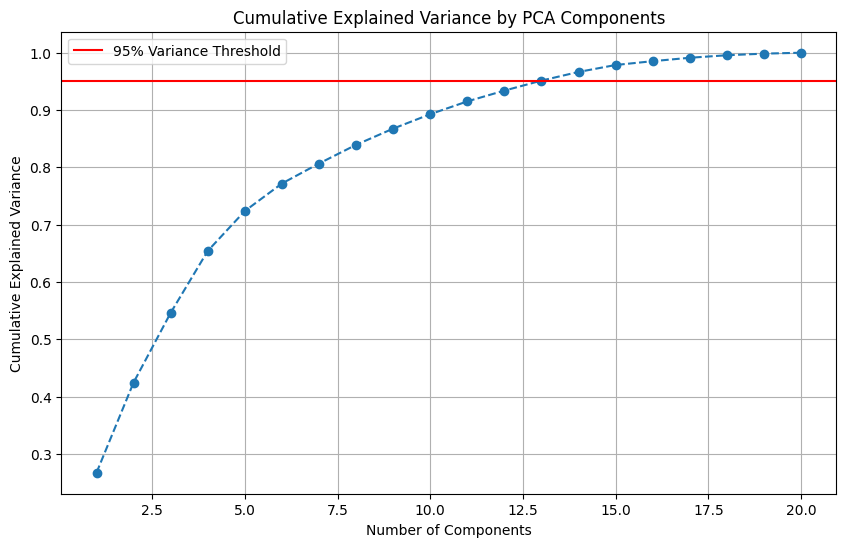

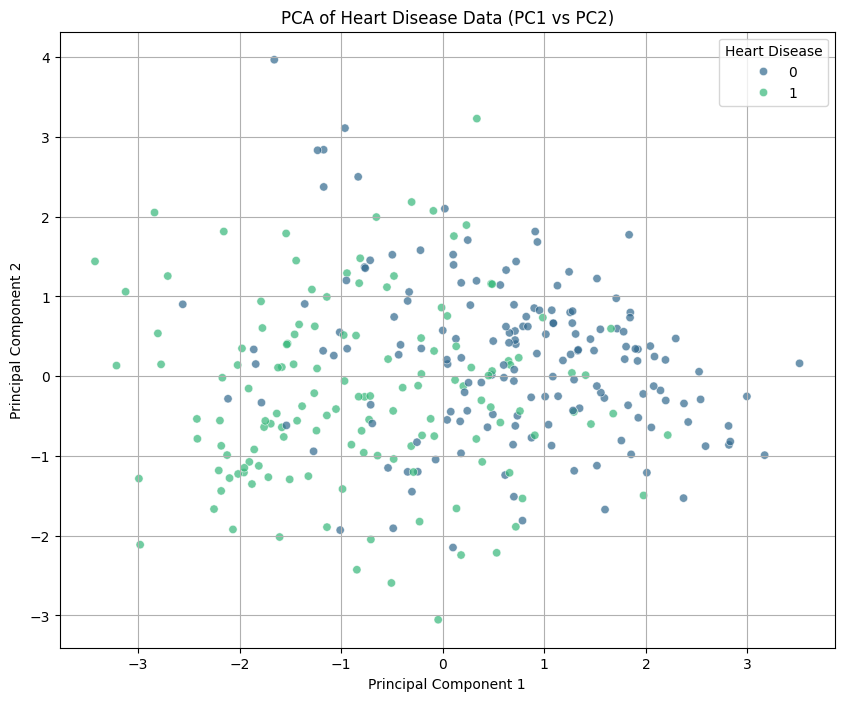

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
import seaborn as sns

file_path="../data/processed_heart_disease.csv"
processed_df=pd.read_csv(file_path)

X = processed_df.drop('target', axis=1)
y = processed_df['target']

pca=PCA(n_components=None)
X_pca=pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='-', label='95% Variance Threshold')
plt.legend()
plt.show()

N_components = np.argmax(cumulative_variance >= 0.95) + 1


pca = PCA(n_components=N_components)
X_pca = pca.fit_transform(X)

pca_cols = [f'PC{i+1}' for i in range(N_components)]
X_pca_df = pd.DataFrame(X_pca, columns=pca_cols)

X_pca_df['target'] = y
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X_pca_df, x='PC1', y='PC2', hue='target', alpha=0.7, palette='viridis')
plt.title('PCA of Heart Disease Data (PC1 vs PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Heart Disease')
plt.grid(True)
plt.show()

X_pca_df.to_csv("../data/heart_disease_pca.csv", index=False)
